In [1]:
#

In [54]:
import json
import time
import numpy
import pandas
from scipy import stats
from data.flat import load
from matplotlib import pyplot
from matplotlib import lines as mlines

In [3]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer
from sklearn.linear_model import LinearRegression

In [4]:
k = 'C:/Users/MainUser/Desktop/OpenAPI_sandbox.txt'
crs = open(k, "r")
for columns in ( raw.strip().split() for raw in crs ):
    api_key = columns[0]

In [5]:
target_quotes = ['MSFT']
news_horizon = 100
effect_horizon = 10

In [6]:
data = await load(api_key, target_quotes, news_horizon, effect_horizon)
data

E:\venv\financial_news_re\lib\site-packages\pandas\core\arrays\datetimelike.py:1265: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  warnings.warn(


2019-08-29 22:27:30.057000
2019-10-05 08:07:58.138000
(9625,)


,id,title,lag,news_time,ticker,time,open_HOZ0_PCT1,close_HOZ0_PCT1,high_HOZ0_PCT1,low_HOZ0_PCT1,...,open_HOZ9_PCT1,close_HOZ9_PCT1,high_HOZ9_PCT1,low_HOZ9_PCT1,volume_HOZ9_PCT1,open_HOZ10_PCT1,close_HOZ10_PCT1,high_HOZ10_PCT1,low_HOZ10_PCT1,volume_HOZ10_PCT1
0,141465.0,"Shares rally, bond yields rise as China fuels ...",4.0,2019-08-29 22:36:30.057,None,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141465.0,"Shares rally, bond yields rise as China fuels ...",5.0,2019-08-29 22:36:30.057,None,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,141465.0,"Shares rally, bond yields rise as China fuels ...",12.0,2019-08-29 22:36:30.057,None,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,141465.0,"Shares rally, bond yields rise as China fuels ...",20.0,2019-08-29 22:36:30.057,MSFT,2019-08-29 22:57:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,141465.0,"Shares rally, bond yields rise as China fuels ...",22.0,2019-08-29 22:36:30.057,MSFT,2019-08-29 22:59:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993325,NaN,None,NaN,NaT,MSFT,2019-09-17 23:46:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993326,NaN,None,NaN,NaT,MSFT,2019-09-05 08:49:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993327,NaN,None,NaN,NaT,MSFT,2019-09-13 08:19:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993328,NaN,None,NaN,NaT,MSFT,2019-09-27 21:55:00+00:00,-0.00029,-0.00029,-0.00029,-0.00029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
a = data.sort_values(by=['id', 'time'])
a = a[~a['title'].isna() & ~a['open_HOZ0_PCT1'].isna()]
data = a.copy()
del a
data

,id,title,lag,news_time,ticker,time,open_HOZ0_PCT1,close_HOZ0_PCT1,high_HOZ0_PCT1,low_HOZ0_PCT1,...,open_HOZ9_PCT1,close_HOZ9_PCT1,high_HOZ9_PCT1,low_HOZ9_PCT1,volume_HOZ9_PCT1,open_HOZ10_PCT1,close_HOZ10_PCT1,high_HOZ10_PCT1,low_HOZ10_PCT1,volume_HOZ10_PCT1
32144,153793.0,Saudi Aramco reportedly favors Tokyo for its o...,92.0,2019-08-30 05:38:18.254,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32158,153852.0,METALS-Shanghai nickel hits record high as was...,90.0,2019-08-30 05:40:51.648,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32172,153853.0,UPDATE 3-General Electric wins partial dismiss...,90.0,2019-08-30 05:40:51.648,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32186,153969.0,Verdict delayed for 2 Cambodia journalists in ...,89.0,2019-08-30 05:41:05.198,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32199,154088.0,Hong Kong pro-democracy group says Joshua Wong...,79.0,2019-08-30 05:51:34.623,MSFT,2019-08-30 07:11:00+00:00,-0.000072,-0.000072,-0.000072,-0.000072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975935,390584.0,Saudi crown prince on Khashoggi killing: ‘I ge...,6.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:53:00+00:00,-0.000143,0.000000,0.000000,-0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250795,390604.0,Naval base in Syria cements Russia’s Mediterra...,5.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:52:00+00:00,0.000143,0.000143,0.000143,0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
975950,390604.0,Naval base in Syria cements Russia’s Mediterra...,6.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:53:00+00:00,-0.000143,0.000000,0.000000,-0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250805,390605.0,"The Latest: Palestinian leader slams Israel, U...",5.0,2019-09-26 21:46:49.527,MSFT,2019-09-26 21:52:00+00:00,0.000143,0.000143,0.000143,0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data.dropna()
data

,id,title,lag,news_time,ticker,time,open_HOZ0_PCT1,close_HOZ0_PCT1,high_HOZ0_PCT1,low_HOZ0_PCT1,...,open_HOZ9_PCT1,close_HOZ9_PCT1,high_HOZ9_PCT1,low_HOZ9_PCT1,volume_HOZ9_PCT1,open_HOZ10_PCT1,close_HOZ10_PCT1,high_HOZ10_PCT1,low_HOZ10_PCT1,volume_HOZ10_PCT1
779022,159990.0,Learn while you earn,96.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:38:00+00:00,0.000722,0.000144,0.000216,-0.000217,...,-0.001366,0.000575,0.000575,-0.001366,9.611399,-0.000359,0.000647,-0.000072,0.000360,18.300000
33826,159990.0,Learn while you earn,97.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:39:00+00:00,0.000000,0.000361,0.000360,0.001011,...,0.002088,-0.002084,-0.000072,0.000144,84.125488,-0.001366,0.000575,0.000575,-0.001366,9.611399
902426,159990.0,Learn while you earn,98.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:40:00+00:00,0.000361,-0.000577,0.000793,0.000144,...,-0.002012,-0.000576,-0.001940,-0.002016,-0.863856,0.002088,-0.002084,-0.000072,0.000144,84.125488
660907,159990.0,Learn while you earn,99.0,2019-08-30 12:01:17.847,MSFT,2019-08-30 13:41:00+00:00,-0.000432,0.000000,-0.001296,-0.000505,...,-0.000360,0.000000,0.000000,0.001010,-0.763830,-0.002012,-0.000576,-0.001940,-0.002016,-0.863856
779033,160141.0,Malaysia's AirAsia cuts Airbus A330neo order p...,95.0,2019-08-30 12:02:41.343,MSFT,2019-08-30 13:38:00+00:00,0.000722,0.000144,0.000216,-0.000217,...,-0.001366,0.000575,0.000575,-0.001366,9.611399,-0.000359,0.000647,-0.000072,0.000360,18.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501209,387068.0,Exxon Mobil to sell its Norway exploration ass...,3.0,2019-09-26 19:55:48.105,MSFT,2019-09-26 19:59:00+00:00,0.000932,0.000143,0.001218,0.000072,...,0.000573,0.000429,0.000429,-0.000215,4.061617,0.000358,0.000716,0.000644,0.000358,-0.237126
501210,387068.0,Exxon Mobil to sell its Norway exploration ass...,4.0,2019-09-26 19:55:48.105,MSFT,2019-09-26 20:00:00+00:00,-0.000072,0.000716,-0.000215,0.000933,...,0.000501,0.000072,0.000215,0.001146,-0.349616,0.000573,0.000429,0.000429,-0.000215,4.061617
501221,387097.0,"Wall Street drops on tech slide, Washington tu...",1.0,2019-09-26 19:58:16.564,MSFT,2019-09-26 20:00:00+00:00,-0.000072,0.000716,-0.000215,0.000933,...,0.000501,0.000072,0.000215,0.001146,-0.349616,0.000573,0.000429,0.000429,-0.000215,4.061617
501235,387117.0,"MEDIA-RBC, Santander, Mizuho said to win covet...",1.0,2019-09-26 19:58:19.352,MSFT,2019-09-26 20:00:00+00:00,-0.000072,0.000716,-0.000215,0.000933,...,0.000501,0.000072,0.000215,0.001146,-0.349616,0.000573,0.000429,0.000429,-0.000215,4.061617


In [27]:
# clarify names

data = data.rename(columns={'lag': 'news_horizon'})

In [28]:
# set model specification

tsi_names = ['news_time']
y_names = ['open_HOZ0_PCT1']
removes = ['news_horizon']
x_names = [x for x in data.columns.values if 'open' in x and x not in (y_names + removes)]

In [29]:
data[x_names]

,open_HOZ1_PCT1,open_HOZ2_PCT1,open_HOZ3_PCT1,open_HOZ4_PCT1,open_HOZ5_PCT1,open_HOZ6_PCT1,open_HOZ7_PCT1,open_HOZ8_PCT1,open_HOZ9_PCT1,open_HOZ10_PCT1
779022,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,-0.001366,-0.000359
33826,0.000722,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,-0.001366
902426,0.000000,0.000722,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088
660907,0.000361,0.000000,0.000722,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012
779033,0.000867,-0.001010,-0.000289,-0.000865,-0.000432,-0.000360,-0.002012,0.002088,-0.001366,-0.000359
...,...,...,...,...,...,...,...,...,...,...
501209,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573,0.000358
501210,0.000932,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573
501221,0.000932,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573
501235,0.000932,-0.000717,0.000143,-0.001432,0.000430,-0.001002,-0.000429,0.000215,0.000501,0.000573


In [30]:
# sampling function

def ts_sampler(T, X, Y, n_folds, test_rate, kind):
    if kind == 'nofolds':
        thresh = int((1 - test_rate) * X.shape[0])
        T_train, X_train, Y_train, T_test, X_test, Y_test = T[:thresh, :], X[:thresh, :], Y[:thresh, :], T[thresh:, :], X[thresh:, :], Y[thresh:, :]
    if kind == 'folded':
        thresh = int((1 - test_rate) * X.shape[0])
        T_train, X_train, Y_train, T_test, X_test, Y_test = T[:thresh, :], X[:thresh, :], Y[:thresh, :], T[thresh:, :], X[thresh:, :], Y[thresh:, :]
        fold_length = thresh / n_folds
        fold_bounds = [(int(j * fold_length), int((j + 1) * fold_length)) for j in range(n_folds)]
        T_train = [T_train[fold_bounds[j][0]:T_train[fold_bounds[j][1]], :] for j in range(n_folds)]
        X_train = [X_train[fold_bounds[j][0]:X_train[fold_bounds[j][1]], :] for j in range(n_folds)]
        Y_train = [Y_train[fold_bounds[j][0]:Y_train[fold_bounds[j][1]], :] for j in range(n_folds)]
    return T_train, X_train, Y_train, T_test, X_test, Y_test
    

In [31]:
# sample (without folds)

kind = 'nofolds'
test_rate = 0.2
T_, X_, Y_ = numpy.array(tsi_names), numpy.array(x_names), numpy.array(y_names)
T, X, Y = data[T_].values, data[X_].values, data[Y_].values
T_train, X_train, Y_train, T_test, X_test, Y_test = ts_sampler(T, X, Y, None, test_rate, kind)

In [32]:
#

In [33]:
# Let's discover

In [34]:
# 

In [189]:
series = pandas.DataFrame(data={'series': Y_train.ravel()})

 0.000000    14595
 0.000144      449
 0.000438      421
-0.000073      386
-0.000359      369
             ...  
-0.003005       11
 0.001005        6
-0.000789        6
-0.001363        2
-0.001581        2
Name: series, Length: 1303, dtype: int64

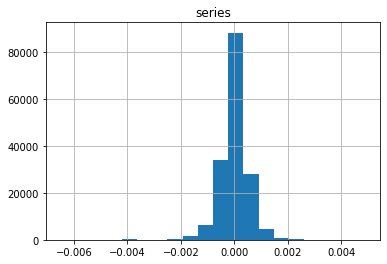

In [190]:
series.hist(bins=20)
series['series'].value_counts()

 0.000000    14595
 0.000144      449
 0.000438      421
-0.000073      386
-0.000359      369
             ...  
 0.000429       11
 0.001005        6
-0.000789        6
-0.001363        2
-0.001581        2
Name: series, Length: 1298, dtype: int64

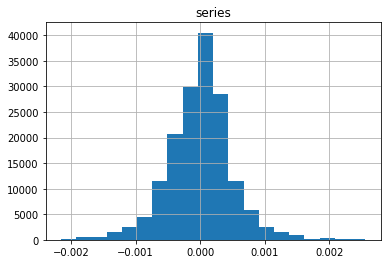

In [44]:
series.query("-0.003 <= series <= 0.003").hist(bins=20)
series.query("-0.003 <= series <= 0.003")['series'].value_counts()

0.004888    126
0.004080     75
Name: series, dtype: int64

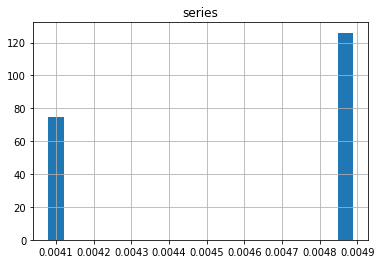

In [45]:
series.query("series >= 0.003").hist(bins=20)
series.query("series >= 0.003")['series'].value_counts()

-0.004131    136
-0.006494    124
-0.003005     11
Name: series, dtype: int64

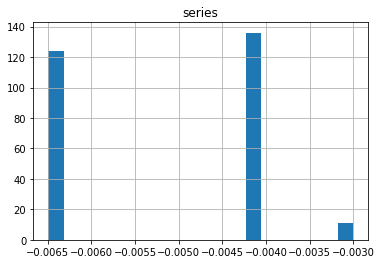

In [46]:
series.query("series <= -0.003").hist(bins=20)
series.query("series <= -0.003")['series'].value_counts()

In [117]:
#

In [35]:
ols_model_sklearn = LinearRegression(fit_intercept=True, n_jobs=-1)
ols_model_sklearn.fit(X=X_train, y=Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [36]:
def get_ols_summary(lm, X, y, names):

    # https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
    
    params = numpy.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    newX = pandas.DataFrame({"Constant":numpy.ones(len(X))}).join(pandas.DataFrame(X))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(numpy.linalg.inv(numpy.dot(newX.T,newX)).diagonal())
    sd_b = numpy.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(numpy.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = numpy.round(sd_b,3)
    ts_b = numpy.round(ts_b,3)
    p_values = numpy.round(p_values,3)
    params = numpy.round(params,4)

    myDF3 = pandas.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
    
    myDF3.index = numpy.array(['intercept'] + [x for x in names])
    return myDF3

In [37]:
def r2_adj(y_true, y_pred, dim0, dim1):
    r2 = r2_score(y_true, y_pred)
    result = 1 - (1 - r2) * (dim0 - 1) / (dim0 - dim1 -1)
    return result

In [38]:
summary = get_ols_summary(ols_model_sklearn, X_train, Y_train, X_)
Y_hat_train = ols_model_sklearn.predict(X_train)
Y_hat_test = ols_model_sklearn.predict(X_test)
print("{0:.4f}".format(r2_adj(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1])))
print("{0:.4f}".format(r2_adj(Y_train, Y_hat_train, X_train.shape[0], X_train.shape[1])))
summary

0.0160
0.0160


,Coefficients,Standard Errors,t values,Probabilities
intercept,-0.0000,0.000,-3.045,0.002
open_HOZ1_PCT1,-0.0390,0.002,-15.858,0.000
open_HOZ2_PCT1,-0.0574,0.002,-23.405,0.000
open_HOZ3_PCT1,-0.0011,0.002,-0.432,0.666
open_HOZ4_PCT1,0.0700,0.002,28.547,0.000
open_HOZ5_PCT1,-0.0046,0.002,-1.909,0.056
open_HOZ6_PCT1,0.0242,0.002,9.956,0.000
open_HOZ7_PCT1,-0.0038,0.002,-1.557,0.119
open_HOZ8_PCT1,0.0353,0.002,14.871,0.000
open_HOZ9_PCT1,-0.0121,0.002,-5.121,0.000


In [244]:
# OK, let's remove those factors that are not significant

In [39]:
significance_level = 0.05  # just let's assume
significance_mask = (summary['Probabilities'] < significance_level).values[1:]
X_[significance_mask].tolist()

['open_HOZ1_PCT1',
 'open_HOZ2_PCT1',
 'open_HOZ4_PCT1',
 'open_HOZ6_PCT1',
 'open_HOZ8_PCT1',
 'open_HOZ9_PCT1',
 'open_HOZ10_PCT1']

In [40]:
del ols_model_sklearn
X_train_adj = X_train[:, significance_mask]
X_test_adj = X_test[:, significance_mask]
X_adj_ = X_[significance_mask]

In [41]:
ols_model_sklearn = LinearRegression(fit_intercept=False, n_jobs=-1)
ols_model_sklearn.fit(X=X_train_adj, y=Y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [42]:
summary = get_ols_summary(ols_model_sklearn, X_train_adj, Y_train, X_adj_)
Y_hat_train = ols_model_sklearn.predict(X_train_adj)
Y_hat_test = ols_model_sklearn.predict(X_test_adj)
print("{0:.4f}".format(r2_adj(Y_train, Y_hat_train, X_train_adj.shape[0], X_train_adj.shape[1])))
print("{0:.4f}".format(r2_adj(Y_train, Y_hat_train, X_train_adj.shape[0], X_train_adj.shape[1])))
summary

0.0159
0.0159


,Coefficients,Standard Errors,t values,Probabilities
intercept,0.0000,0.000,0.000,1.0
open_HOZ1_PCT1,-0.0393,0.002,-16.040,0.0
open_HOZ2_PCT1,-0.0574,0.002,-23.406,0.0
open_HOZ4_PCT1,0.0702,0.002,28.710,0.0
open_HOZ6_PCT1,0.0246,0.002,10.148,0.0
open_HOZ8_PCT1,0.0354,0.002,14.965,0.0
open_HOZ9_PCT1,-0.0121,0.002,-5.140,0.0
open_HOZ10_PCT1,-0.0582,0.002,-24.686,0.0


In [263]:
# 

In [78]:
# (Add recursive feature elimination: full batch drop and sequentially)

In [ ]:
def recursive_batch(model, model_params, X, Y, censor, X_test=None, Y_test=None, X_=None):
    names = X_ is not None
    test = X_test is not None and Y_test is not None
    if names:
        XX_ = X_.copy()
    if test:
        XX_test, YY_test = X_test.copy(), Y_test.copy()
    done = False
    XX, YY = X.copy(), Y.copy()
    mask = numpy.array([True] * XX.shape[1])
    while not done:
        XX, YY = XX[mask], YY
        if names:
            XX_ = XX_[mask]
        if test:
            XX_test, YY_test = XX_test[mask], YY_test
        mask = censor(model, XX, YY)
        done = mask.sum() == 0
    if not names and not test:
        return XX, YY
    if not names and test:
        return XX, YY, XX_test, YY_test
    if names and not test:
        return XX, YY, XX_
    if names and test:
        return XX, YY, XX_test, YY_test, XX_

In [ ]:
def censory(model, XX, YY):
    if XX.shape[1] == 0:
        mask = numpy.array([False])
    else:
        p_values = get_ols_summary(model, XX, YY, list(range(XX.shape[1])))['Probabilities'].values[1:]
        mask = p_values < 0.05
    return mask

array([[1, 2],
       [3, 4]])

0

In [76]:
def visualise_predictions(model, X_train, Y_train, X_test, Y_test, time_series=False, quantiles=(.05, .50, .95), freq=.1):
    Y_train_hat = model.predict(X_train)
    Y_test_hat = model.predict(X_test)
    train_err, test_err = Y_train - Y_train_hat, Y_test - Y_test_hat
    if time_series:
        fig, ax = pyplot.subplots(3, 2, figsize=(10, 10))

        
        x_train, x_test = numpy.array(numpy.arange(Y_train.shape[0])), numpy.array(numpy.arange(Y_test.shape[0]))

        cum_train_true, cum_train_hat = numpy.cumprod(Y_train + 1), numpy.cumprod(Y_train_hat + 1)
        cum_test_true, cum_test_hat = numpy.cumprod(Y_test + 1), numpy.cumprod(Y_test_hat + 1)
        
        ax[0, 0].plot(x_train, cum_train_true, 'navy', x_train, cum_train_hat, 'blueviolet')
        true_train_line = mlines.Line2D([], [], color='navy', label='True Train')
                                  # marker='*', markersize=15, label='Blue stars')
        hat_train_line = mlines.Line2D([], [], color='blueviolet', label='Estimated Train')
        ax[0, 0].legend(handles=[true_train_line, hat_train_line])
        
        ax[0, 1].plot(x_test, cum_test_true, 'navy', x_test, cum_test_hat, 'blueviolet')
        true_test_line = mlines.Line2D([], [], color='navy', label='True Test')
        hat_test_line = mlines.Line2D([], [], color='blueviolet', label='Estimated Test')
        ax[0, 1].legend(handles=[true_test_line, hat_test_line])
        
        
        ax[1, 0].hist(train_err, 50, density=True, facecolor='dodgerblue', alpha=0.5)
        ax[1, 0].hist(test_err, 50, density=True, facecolor='aqua', alpha=0.5)
        train_err_line = mlines.Line2D([], [], color='dodgerblue', label='Train Errors')
        test_err_line = mlines.Line2D([], [], color='aqua', label='Test Errors')
        ax[1, 0].legend(handles=[train_err_line, test_err_line])
        
        train_err_ecdf__y, train_err_ecdf__x = numpy.histogram(train_err, bins=50, density=True)
        train_err_ecdf__y, train_err_ecdf__x = numpy.cumsum(train_err_ecdf__y), train_err_ecdf__x[:-1]
        train_err_ecdf__y = train_err_ecdf__y / numpy.max(train_err_ecdf__y)
        test_err_ecdf__y, test_err_ecdf__x = numpy.histogram(test_err, bins=50, density=True)
        test_err_ecdf__y, test_err_ecdf__x = numpy.cumsum(test_err_ecdf__y), test_err_ecdf__x[:-1]
        test_err_ecdf__y = test_err_ecdf__y / numpy.max(test_err_ecdf__y)
        
        ax[1, 1].plot(train_err_ecdf__x, train_err_ecdf__y, 'dodgerblue', test_err_ecdf__x, test_err_ecdf__y, 'aqua')
        train_err_line = mlines.Line2D([], [], color='dodgerblue', label='Train Errors')
        test_err_line = mlines.Line2D([], [], color='aqua', label='Test Errors')
        ax[1, 1].legend(handles=[train_err_line, test_err_line])
        
        # add here dynamic errors !
    else:
        raise Exception("Time Series functionality available only. Set 'time_series' parameter to True")

E:\venv\financial_news_re\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


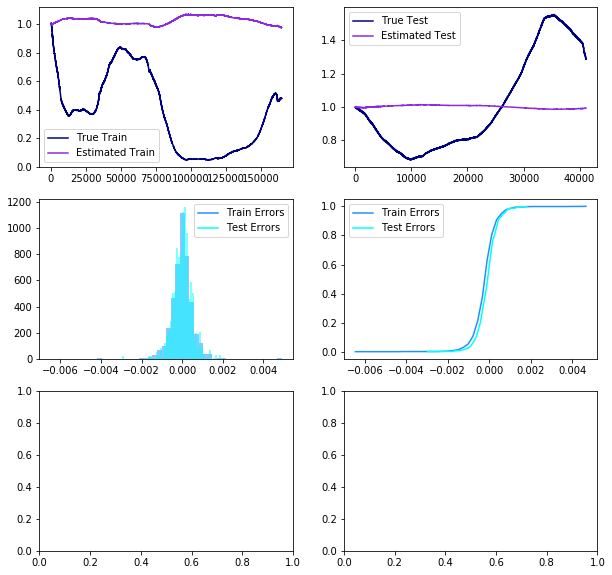

In [77]:
visualise_predictions(ols_model_sklearn, X_train_adj, Y_train, X_test_adj, Y_test, time_series=True)